Installing dependencies

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

Importing necessary packages

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [219]:
original_data_path=r'room_areasNEW.csv'

In [220]:
data = pd.read_csv(original_data_path)
data.head(20)

,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),Room 8 Area (sq. meters),Room 9 Area (sq. meters)
0,0,40.282471,15.721436,4.597778,4.983398,0.000000,0.000000,0.000000,10.480957,0.000000,6.199585
1,1,51.831299,20.507080,5.018005,2.185181,0.000000,11.158264,0.000000,17.491333,0.000000,2.689453
2,2,38.448303,14.871094,8.429260,5.072388,0.000000,0.000000,0.000000,12.280518,12.997375,4.805420
3,3,28.768250,11.093994,3.599121,2.442261,0.000000,7.573975,0.000000,8.048584,0.000000,4.805420
4,4,32.382202,12.814453,5.472839,3.737549,0.000000,0.000000,0.000000,13.081421,0.000000,4.118225
5,5,44.568787,13.249512,9.175781,3.371704,0.000000,12.137146,9.492188,0.000000,0.000000,0.000000
6,6,24.150696,11.568604,4.983398,4.004517,0.000000,0.000000,4.884521,9.966797,0.000000,1.868774
7,7,33.370972,12.740295,6.644531,2.966309,0.000000,0.000000,0.000000,7.613525,0.000000,1.853943
8,8,31.373657,14.337158,7.840942,6.941162,0.000000,0.000000,0.000000,11.761414,0.000000,3.697998
9,9,34.621765,15.123230,7.203186,3.342041,0.000000,0.000000,0.000000,12.280518,0.000000,1.631470


In [221]:
data.columns

Index(['Image ID', 'Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)'],
      dtype='object')

In [222]:
data.shape

(80788, 11)

In [223]:
for i in data.columns:
    print(i,"Minimum Value: ",min(data[i]),"Maximum Value: ",max(data[i]))

Image ID Minimum Value:  0 Maximum Value:  80787
Room 0 Area (sq. meters) Minimum Value:  16.13671875 Maximum Value:  61.82775879
Room 1 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  42.58135986
Room 2 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  29.50982666
Room 3 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  20.01269531
Room 4 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  35.02716064
Room 5 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  25.90576172
Room 6 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  39.1305542
Room 7 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  30.76062012
Room 8 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  24.88238525
Room 9 Area (sq. meters) Minimum Value:  0.0 Maximum Value:  46.48699951


Simple Visualization to check the distribution of a column

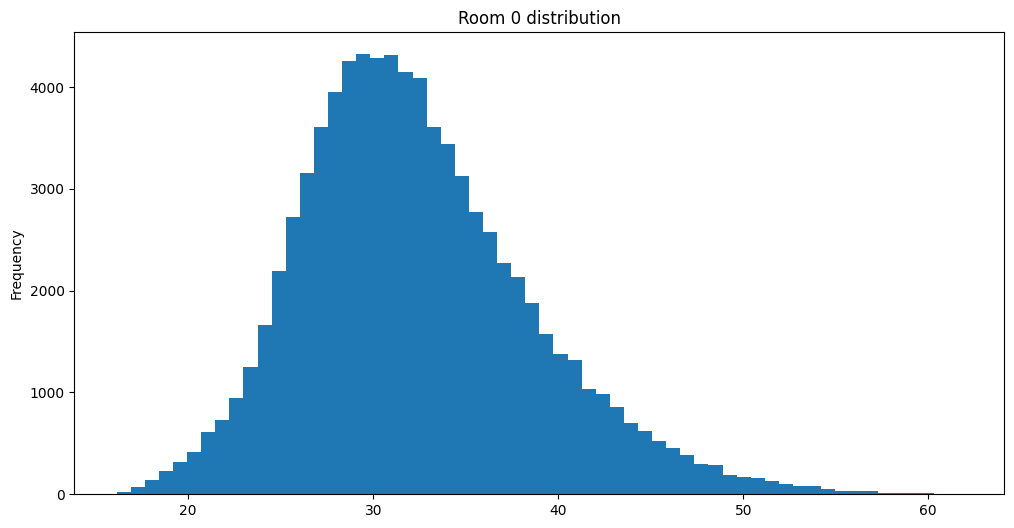

In [153]:
room0 = data['Room 0 Area (sq. meters)']
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
room0.plot.hist(bins=60)
plt.title("Room 0 distribution")
plt.show()

Checking if the data follows a distribution

TypeError: 'Axes' object is not subscriptable

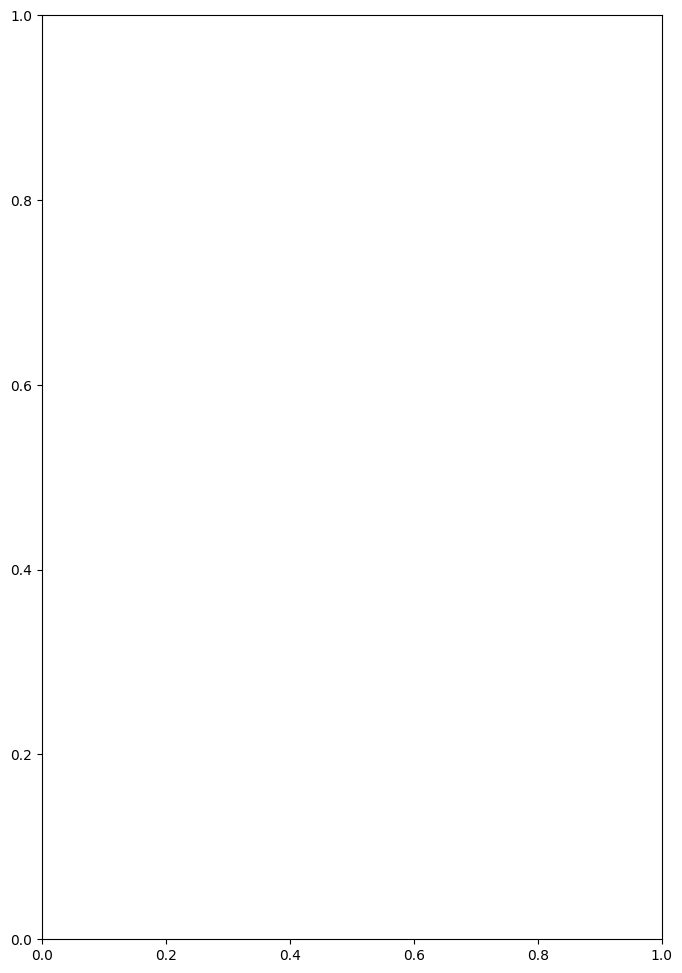

In [236]:
## Fitting the graph for room 0
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm, gamma, beta, weibull_min
from scipy.optimize import curve_fit

# Sample data (replace with your actual data)
data1 = room0

# Define the distribution functions and their names
fit_functions = [norm]
dist_names = ['Normal']

# Create subplots
fig, axes = plt.subplots(len(fit_functions), 1, figsize=(8, 12))

# Define a custom gamma distribution function
def custom_gamma(x, k, theta):
    return gamma.pdf(x, k, scale=theta)

for i, (dist_func, dist_name) in enumerate(zip(fit_functions, dist_names)):
    # Fit the distribution to the data
    if dist_func == gamma:
        params, _ = curve_fit(custom_gamma, data1, p0=(1, 1))  # Specify initial guesses for k and theta
    else:
        params = dist_func.fit(data1)
    fitted_distribution = dist_func(*params)

    # Generate x values for the fitted distribution
    x = np.linspace(min(data1), max(data1), 1000)

    # Plot the histogram of the data
    axes[i].hist(data1, bins=30, density=True, alpha=0.5, label='Data', color='blue')

    # Plot the fitted distribution curve
    if dist_func == gamma:
        axes[i].plot(x, custom_gamma(x, *params), label=dist_name, color='red')
    else:
        axes[i].plot(x, fitted_distribution.pdf(x), label=dist_name, color='red')

    axes[i].set_title(f'{dist_name} Fit')
    axes[i].legend()

    # # Generate and display the equation for the distribution
    # if dist_func == norm:  # Normal Distribution
    #     mu, sigma = params
    #     equation = f'f(x) = (1/({sigma} * sqrt(2*pi))) * exp(-((x - {mu})^2) / (2*{sigma}^2))'
    
    # elif dist_func == expon:  # Exponential Distribution
    #     lambda_ = params[0]
    #     equation = f'f(x) = {lambda_} * exp(-{lambda_} * x)'
    
    # elif dist_func == lognorm:  # Log-Normal Distribution
    #     mu, sigma = params[0], params[1]
    #     equation = f'f(x) = (1/(x * {sigma} * sqrt(2*pi))) * exp(-((ln(x) - {mu})^2) / (2*{sigma}^2))'
    
    # elif dist_func == gamma:  # Gamma Distribution
    #     k, theta = params
    #     equation = f'f(x) = ({k} * x^({k-1}) * exp(-x/{theta})) / ({theta}^{k} * gamma({k}))'
    
    # elif dist_func == beta:  # Beta Distribution
    #     alpha, beta_ = params[0], params[1]
    #     equation = f'f(x) = (x^({alpha-1}) * (1-x)^({beta_-1})) / (B({alpha}, {beta_}))'
    
    # elif dist_func == weibull_min:  # Weibull Distribution
    #     k, lambda_ = params[0], params[1]
    #     equation = f'f(x) = ({k}/{lambda_}) * (x/{lambda_})^({k-1}) * exp(-(x/{lambda_})^{k})'
    
    # print(f'{dist_name} Equation: {equation}')

plt.tight_layout()
plt.show()


In [239]:
data.columns

Index(['Image ID', 'Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)'],
      dtype='object')

In [240]:
df_to_print=data[['Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)']]

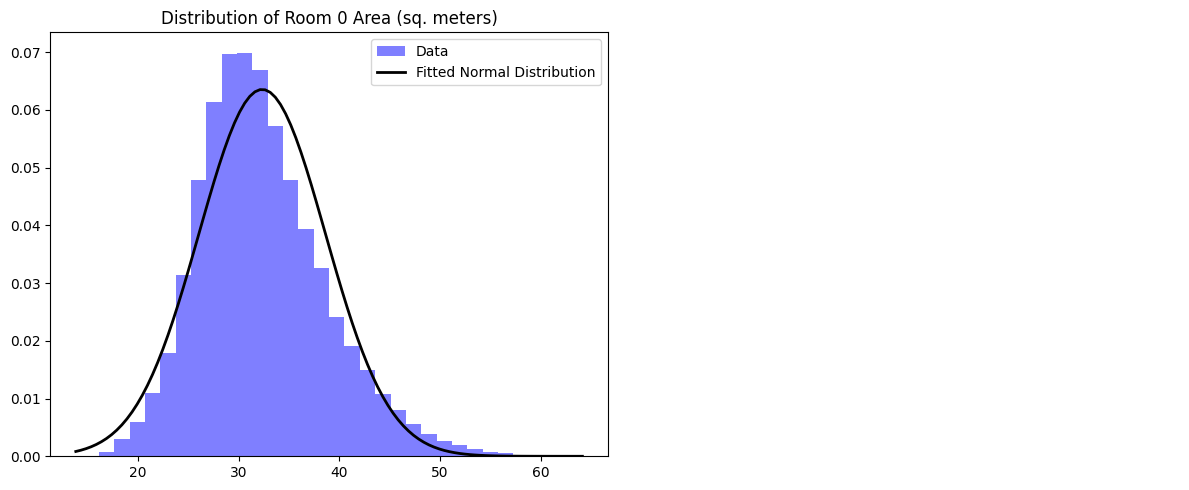

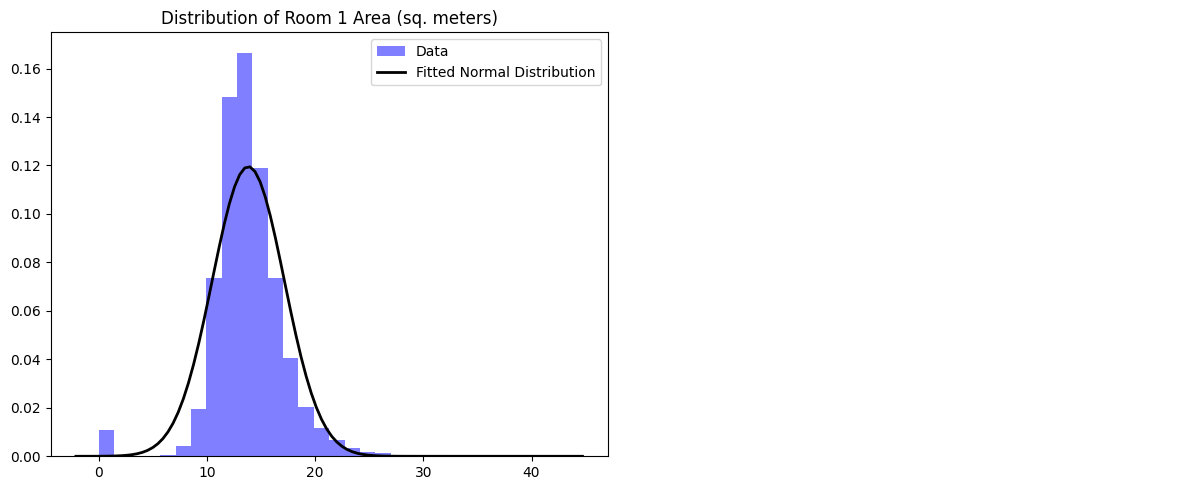

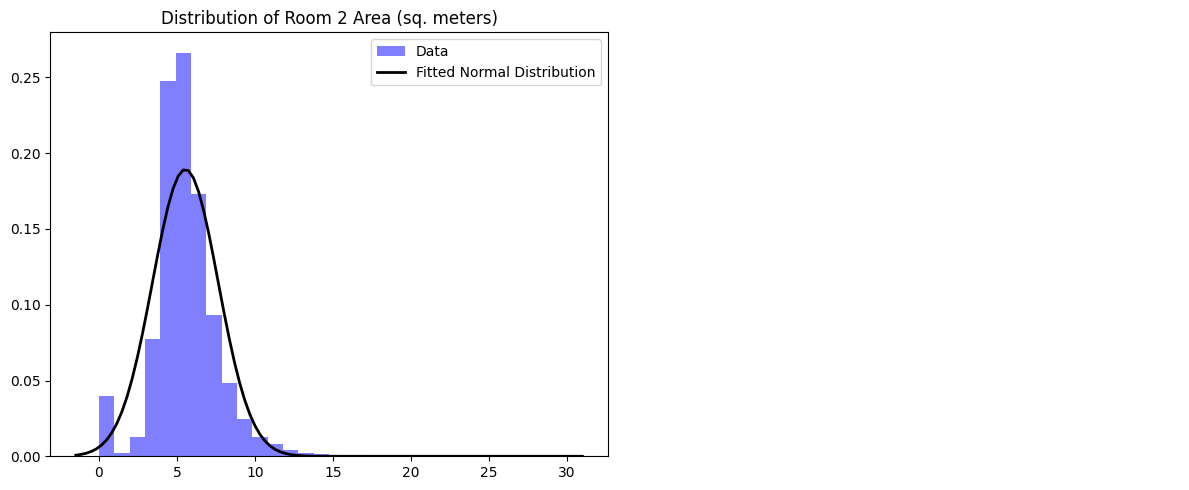

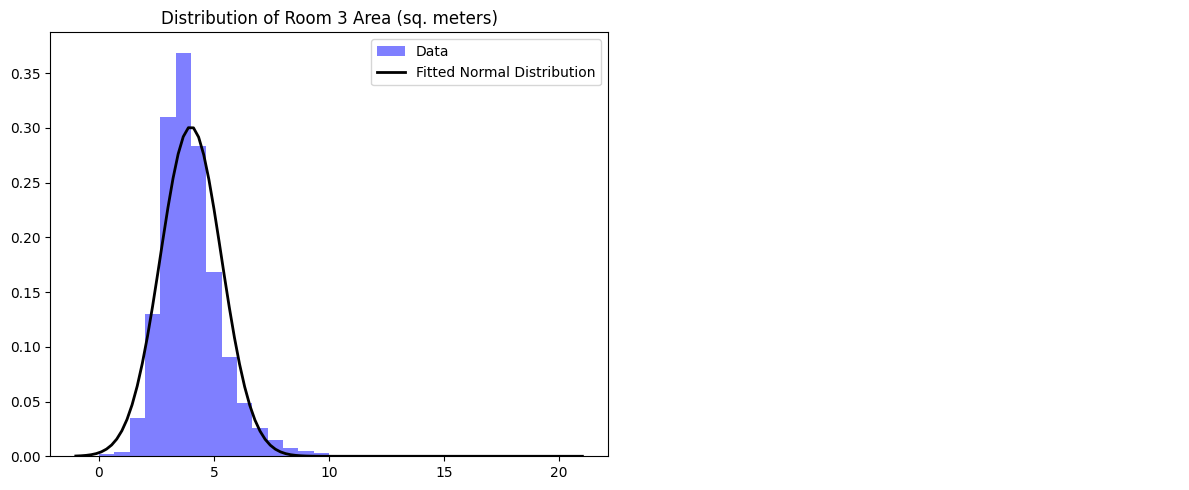

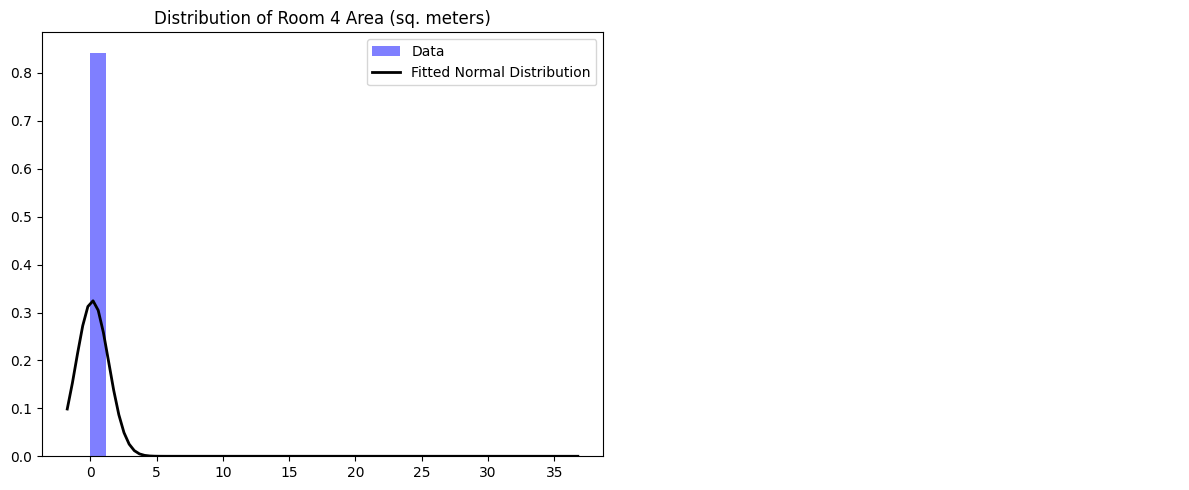

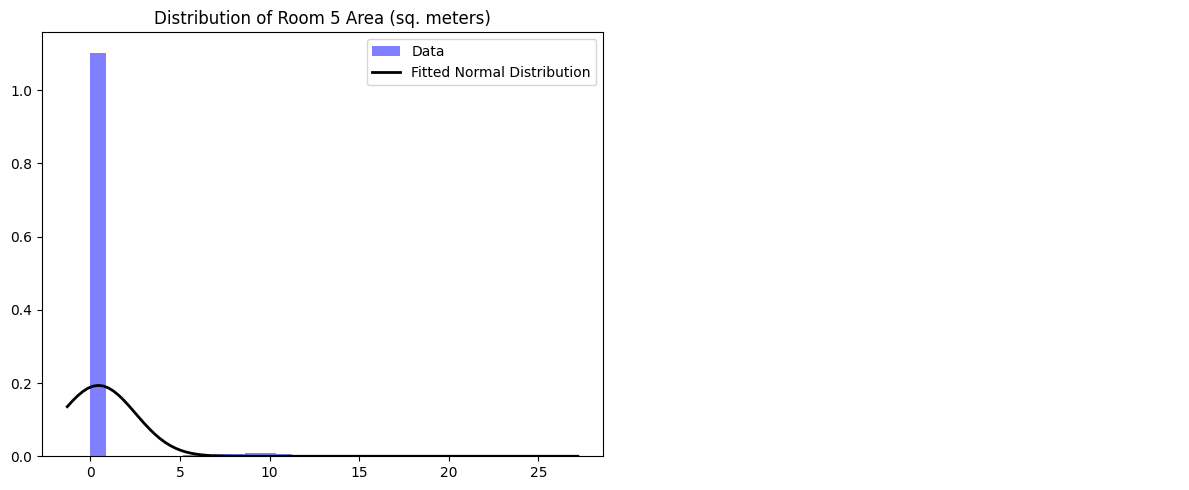

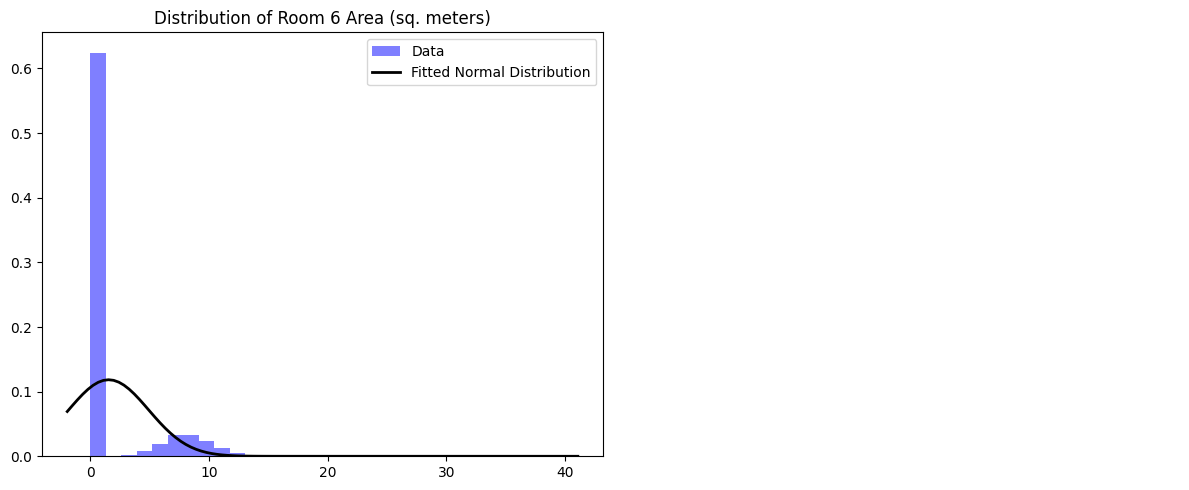

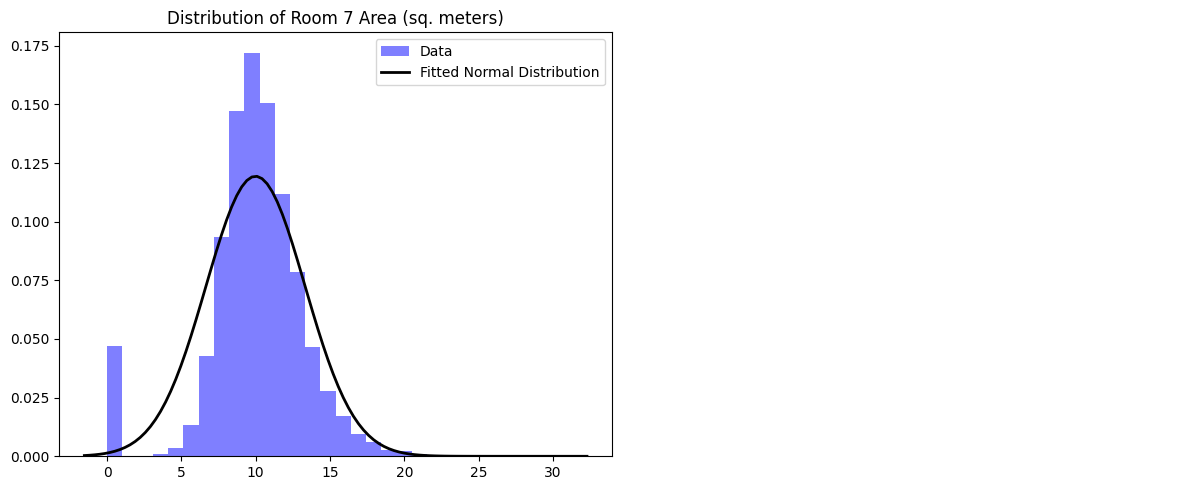

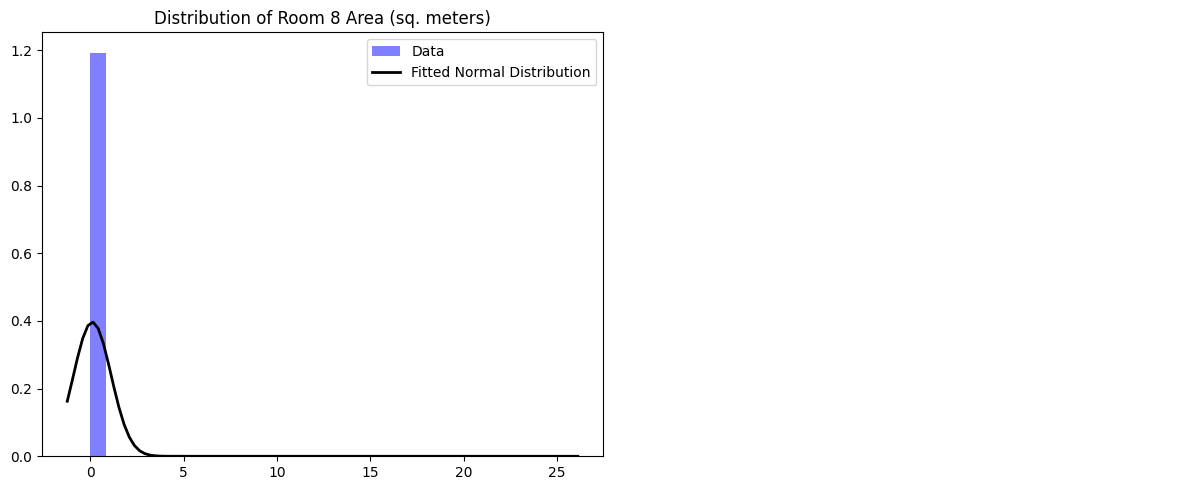

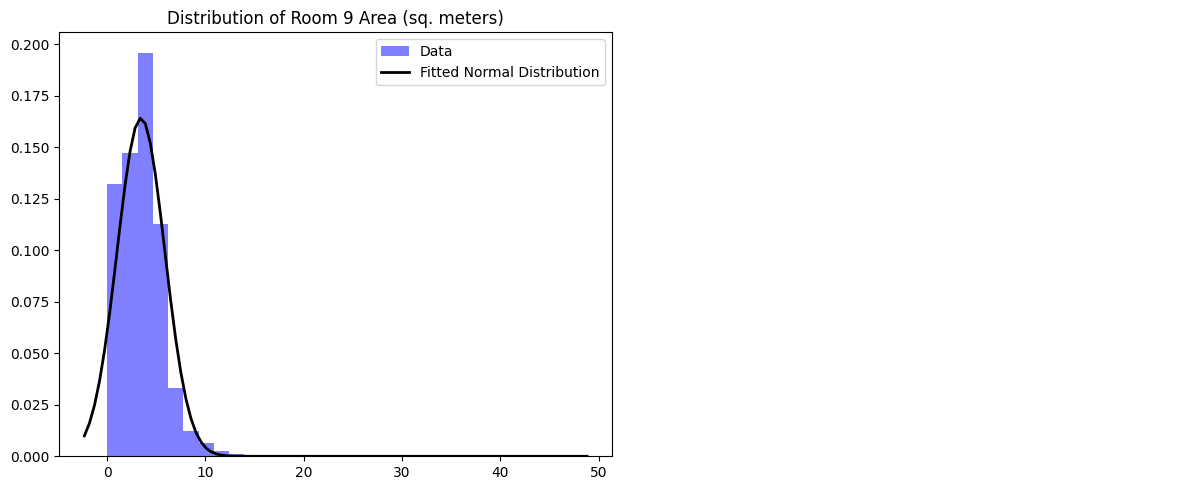

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, normaltest


num_bins = 30



for col in df_to_print.columns:
    data = df_to_print[col].dropna() 
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].hist(data, bins=num_bins, density=True, alpha=0.5, color='blue', label='Data')
    axes[0].set_title(f'Distribution of {col}')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    
    # Plot the PDF of the fitted normal distribution
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[0].plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
    axes[0].legend()
    
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()


Calculating the total area of the each house

In [155]:
data['Total Area']=data['Room 0 Area (sq. meters)']+data['Room 1 Area (sq. meters)']+data['Room 2 Area (sq. meters)']+data['Room 3 Area (sq. meters)']+data['Room 4 Area (sq. meters)']+data['Room 5 Area (sq. meters)']+data['Room 6 Area (sq. meters)']+data['Room 7 Area (sq. meters)']+data['Room 8 Area (sq. meters)']+data['Room 9 Area (sq. meters)']

In [156]:
data.head(5)

,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),Room 8 Area (sq. meters),Room 9 Area (sq. meters),Total Area
0,0,40.282471,15.721436,4.597778,4.983398,0.0,0.000000,0.0,10.480957,0.000000,6.199585,82.265625
1,1,51.831299,20.507080,5.018005,2.185181,0.0,11.158264,0.0,17.491333,0.000000,2.689453,110.880615
2,2,38.448303,14.871094,8.429260,5.072388,0.0,0.000000,0.0,12.280518,12.997375,4.805420,96.904358
3,3,28.768250,11.093994,3.599121,2.442261,0.0,7.573975,0.0,8.048584,0.000000,4.805420,66.331604
4,4,32.382202,12.814453,5.472839,3.737549,0.0,0.000000,0.0,13.081421,0.000000,4.118225,71.606689


Checking to see correlation between a room's area and total house area, and between two rooms

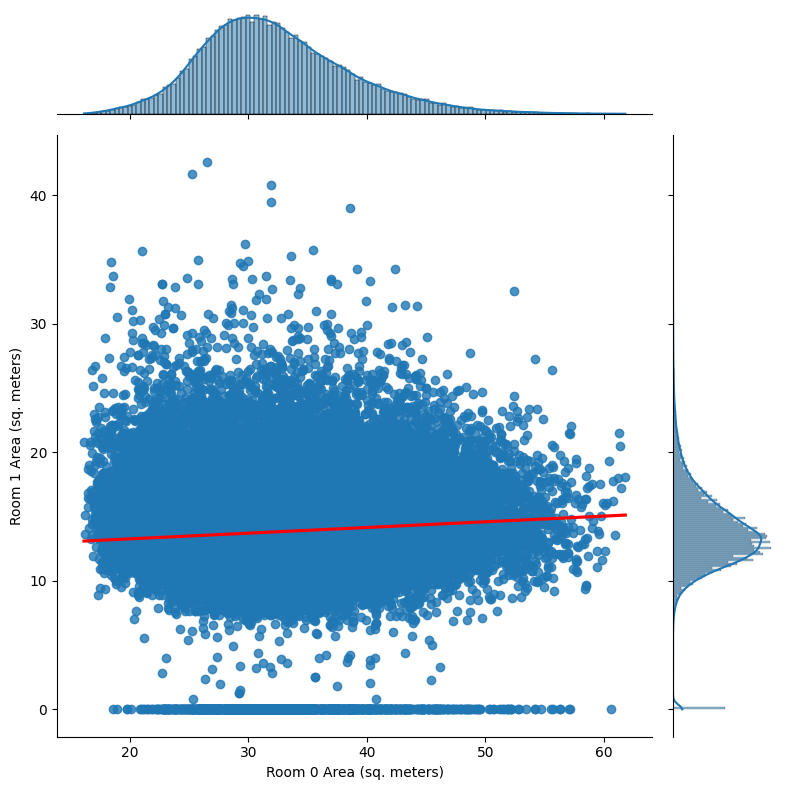

In [157]:
room1=data['Room 1 Area (sq. meters)']
tot_area=data['Total Area']
qx = sns.jointplot(x=room0, y=room1, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
plt.show()

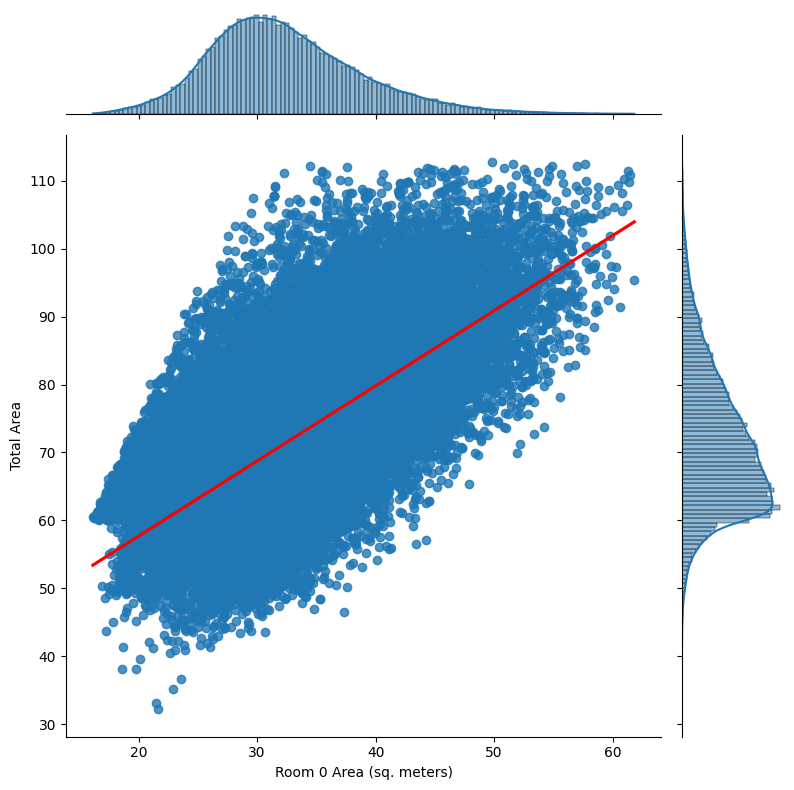

In [158]:
room1=data['Room 1 Area (sq. meters)']
tot_area=data['Total Area']
qx = sns.jointplot(x=room0, y=tot_area, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
plt.show()

Quick summarization of the data

In [159]:
data.describe()

,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),Room 8 Area (sq. meters),Room 9 Area (sq. meters),Total Area
count,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000
mean,40393.500000,32.342635,13.807827,5.543989,3.998908,0.144817,0.446967,1.532830,9.985488,0.098553,3.433363,71.335375
std,23321.631111,6.278038,3.337119,2.107139,1.325179,1.228556,2.061749,3.368584,3.341523,1.004909,2.430003,10.221781
min,0.000000,16.136719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.204224
25%,20196.750000,27.972290,12.053101,4.498901,3.134399,0.000000,0.000000,0.000000,8.513306,0.000000,1.928101,63.622375
50%,40393.500000,31.571411,13.565918,5.364075,3.811707,0.000000,0.000000,0.000000,10.060730,0.000000,3.470581,69.648926
75%,60590.250000,36.001099,15.424805,6.506104,4.627441,0.000000,0.000000,0.000000,11.791077,0.000000,4.717667,77.489868
max,80787.000000,61.827759,42.581360,29.509827,20.012695,35.027161,25.905762,39.130554,30.760620,24.882385,46.487000,112.744446


We can observe that all houses have a living room and that there are no missing entries ie., all plans have a value for each column


Visualizing the carpet area of each house

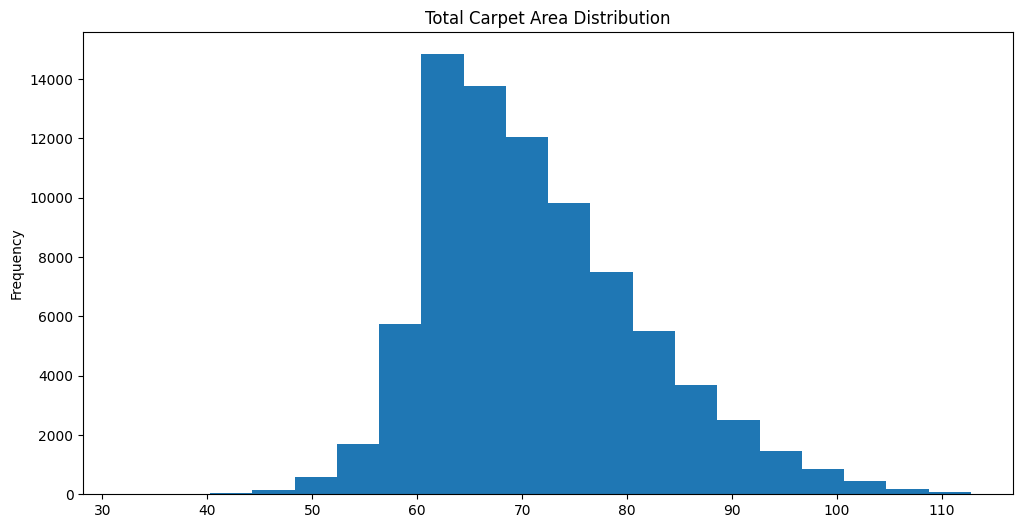

In [160]:
total_area = data['Total Area']
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
total_area.plot.hist(bins=20)
plt.title("Total Carpet Area Distribution")
plt.show()

Visualizing each room's areas

In [161]:
rooms_list=['Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)']

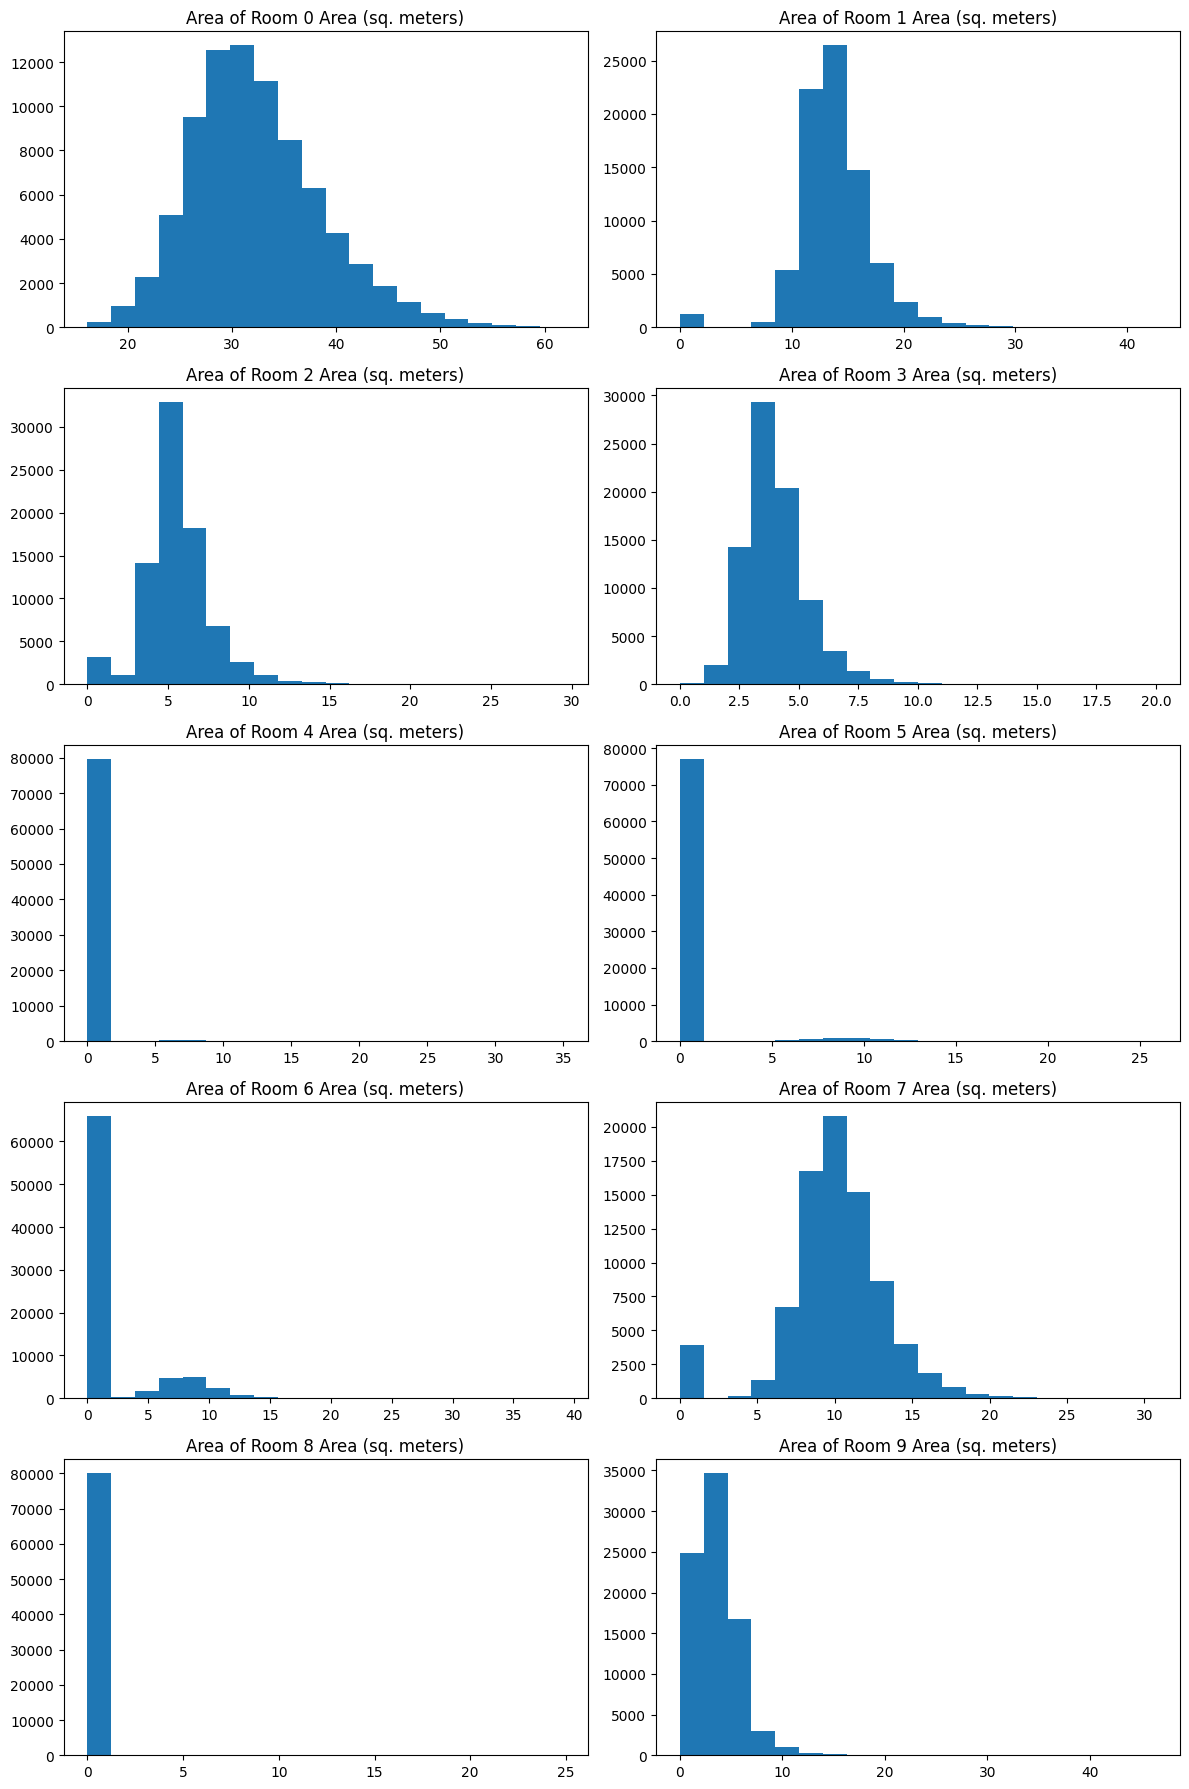

In [162]:
fig, axes = plt.subplots(5, 2, figsize=(12, 18))
axes = axes.ravel()  # Flatten the 2D array for easy iteration

for i, room_name in enumerate(rooms_list):
    var = data[room_name]
    axes[i].hist(var, bins=20)
    axes[i].set_title("Area of " + room_name)

# Remove any extra empty subplots (if you havefewer than 10 rooms)
for j in range(len(rooms_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [250]:
data.columns

AttributeError: 'Series' object has no attribute 'columns'

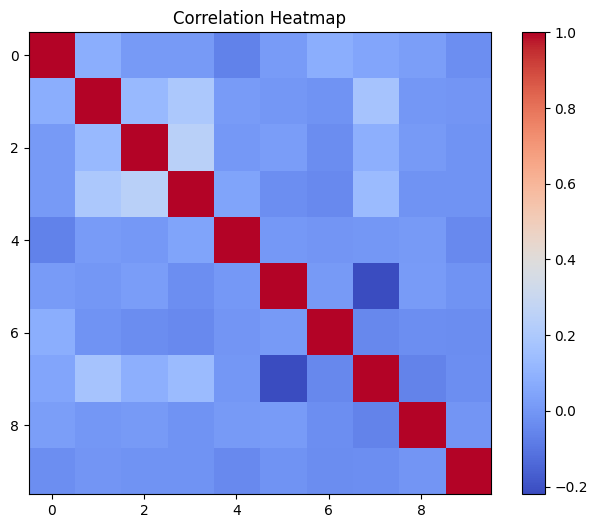

In [256]:
import pandas as pd
import matplotlib.pyplot as plt


correlation_matrix = df_to_print.corr()

plt.figure(figsize=(8, 6))
plt.title('Correlation Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.show()

In [164]:
data.columns

Index(['Image ID', 'Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)', 'Total Area'],
      dtype='object')

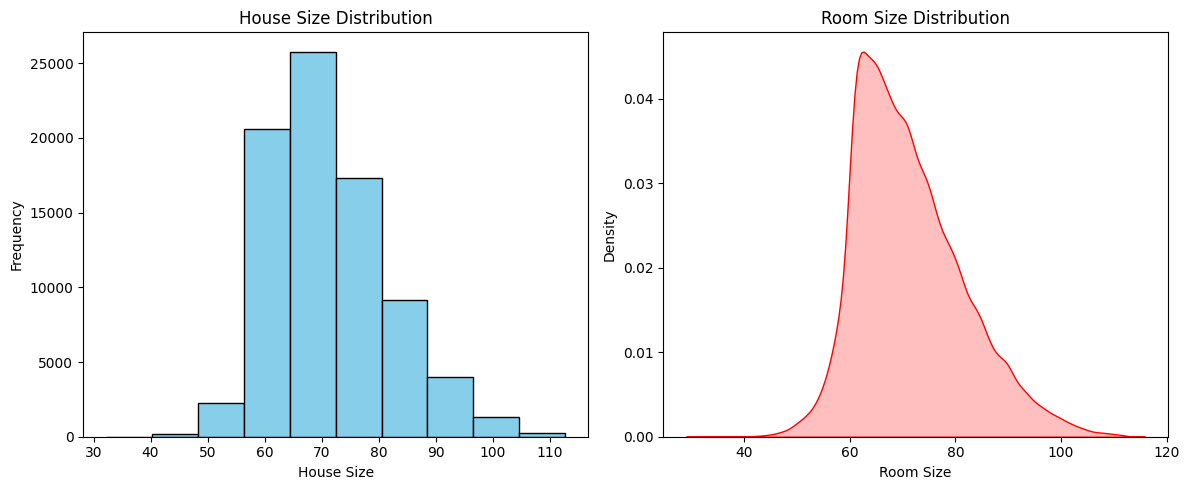

In [165]:
import pandas as pd
import matplotlib.pyplot as plt



# Create subplots for house size and room size distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of house sizes (Histogram)
axes[0].hist(data['Total Area'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('House Size Distribution')
axes[0].set_xlabel('House Size')
axes[0].set_ylabel('Frequency')

# Plot the distribution of room sizes (Kernel Density Plot)
import seaborn as sns
sns.kdeplot(data['Total Area'], ax=axes[1], color='red', fill=True)
axes[1].set_title('Room Size Distribution')
axes[1].set_xlabel('Room Size')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


Gathering limits for minimum widths and areas for each type of room for filtration

In [224]:
min_size=dict()
min_size[0]=11.5
min_size[1]=11
min_size[2]=5
min_size[3]=1.8
min_size[4]=7.5
min_size[5]=9
min_size[6]=9
min_size[7]=7.5
min_size[8]=12
min_size[9]=1.5


min_width=dict()
min_width[0]=3
min_width[1]=3
min_width[2]=1.8
min_width[3]=1.2
min_width[4]=2.5
min_width[5]=3
min_width[6]=3
min_width[7]=2.5
min_width[8]=3
min_width[9]=0.7

In [167]:
df=data.copy(deep=True)
df.head()

,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),Room 8 Area (sq. meters),Room 9 Area (sq. meters),Total Area
0,0,40.282471,15.721436,4.597778,4.983398,0.0,0.000000,0.0,10.480957,0.000000,6.199585,82.265625
1,1,51.831299,20.507080,5.018005,2.185181,0.0,11.158264,0.0,17.491333,0.000000,2.689453,110.880615
2,2,38.448303,14.871094,8.429260,5.072388,0.0,0.000000,0.0,12.280518,12.997375,4.805420,96.904358
3,3,28.768250,11.093994,3.599121,2.442261,0.0,7.573975,0.0,8.048584,0.000000,4.805420,66.331604
4,4,32.382202,12.814453,5.472839,3.737549,0.0,0.000000,0.0,13.081421,0.000000,4.118225,71.606689


Setting a tolerance level for the filtration process

In [225]:
tolerance=0.05

Proceeding to check if each room in a floorplan satisfies the conditions prescribed

In [228]:
room0_min_size=(df['Room 0 Area (sq. meters)']/(1+tolerance) > min_size[0])
df['room0_valid']=room0_min_size
true_count = (df['room0_valid'] == True).sum()
print(true_count)

80788


In [227]:
room1_min_size=((df['Room 1 Area (sq. meters)']/(1+tolerance) > min_size[1]) | (df['Room 1 Area (sq. meters)']==0))
df['room1_valid']=room1_min_size
true_count = (df['room1_valid'] == True).sum()
print(true_count)

67700


In [171]:
room2_min_size=((df['Room 2 Area (sq. meters)']/(1+tolerance) > min_size[2]) | (df['Room 2 Area (sq. meters)']==0))
df['room2_valid']=room2_min_size
true_count = (df['room2_valid'] == True).sum()
print(true_count)

46018


In [172]:
room3_min_size=((df['Room 3 Area (sq. meters)']/(1+tolerance) > min_size[3]) | (df['Room 3 Area (sq. meters)']==0))
df['room3_valid']=room3_min_size
true_count = (df['room3_valid'] == True).sum()
print(true_count)

79169


In [173]:
room4_min_size=((df['Room 4 Area (sq. meters)']/(1+tolerance) > min_size[4]) | (df['Room 4 Area (sq. meters)']==0))
df['room4_valid']=room4_min_size
true_count = (df['room4_valid'] == True).sum()
print(true_count)

80189


In [174]:
room5_min_size=((df['Room 5 Area (sq. meters)']/(1+tolerance) > min_size[5]) | (df['Room 5 Area (sq. meters)']==0))
df['room5_valid']=room5_min_size
true_count = (df['room5_valid'] == True).sum()
print(true_count)

78672


In [175]:
room6_min_size=((df['Room 6 Area (sq. meters)']/(1+tolerance) > min_size[6]) | (df['Room 6 Area (sq. meters)']==0))
df['room6_valid']=room6_min_size
true_count = (df['room6_valid'] == True).sum()
print(true_count)

69920


In [176]:
room7_min_size=((df['Room 7 Area (sq. meters)']/(1+tolerance) > min_size[7]) | (df['Room 7 Area (sq. meters)']==0))
df['room7_valid']=room7_min_size
true_count = (df['room7_valid'] == True).sum()
print(true_count)

71098


In [177]:
room8_min_size=((df['Room 8 Area (sq. meters)']/(1+tolerance) > min_size[8]) | (df['Room 8 Area (sq. meters)']==0))
df['room8_valid']=room8_min_size
true_count = (df['room8_valid'] == True).sum()
print(true_count)

80050


In [229]:
room9_min_size=((df['Room 9 Area (sq. meters)']/(1+tolerance) > min_size[9]) | (df['Room 9 Area (sq. meters)']==0))
df['room9_valid']=room9_min_size
true_count = (df['room9_valid'] == True).sum()
print(true_count)

77276


In [179]:
df.head()

,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),Room 8 Area (sq. meters),...,room0_valid,room1_valid,room2_valid,room3_valid,room4_valid,room5_valid,room6_valid,room7_valid,room8_valid,room9_valid
0,0,40.282471,15.721436,4.597778,4.983398,0.0,0.000000,0.0,10.480957,0.000000,...,True,True,False,True,True,True,True,True,True,True
1,1,51.831299,20.507080,5.018005,2.185181,0.0,11.158264,0.0,17.491333,0.000000,...,True,True,False,True,True,True,True,True,True,True
2,2,38.448303,14.871094,8.429260,5.072388,0.0,0.000000,0.0,12.280518,12.997375,...,True,True,True,True,True,True,True,True,True,True
3,3,28.768250,11.093994,3.599121,2.442261,0.0,7.573975,0.0,8.048584,0.000000,...,True,False,False,True,True,False,True,True,True,True
4,4,32.382202,12.814453,5.472839,3.737549,0.0,0.000000,0.0,13.081421,0.000000,...,True,True,True,True,True,True,True,True,True,True


For a plan to be valid area-wise, each room in the floorplan must satisfy the conditions for area. Checking for that.

In [180]:
df['area_valid']=df['room0_valid'] & df['room1_valid'] & df['room2_valid'] & df['room3_valid'] & df['room4_valid'] & df['room5_valid'] & df['room6_valid'] & df['room7_valid'] & df['room8_valid'] & df['room9_valid']

In [181]:
area_valid_count = (df['area_valid'] == True).sum()
print(area_valid_count)

29930


In [182]:
df.columns

Index(['Image ID', 'Room 0 Area (sq. meters)', 'Room 1 Area (sq. meters)',
       'Room 2 Area (sq. meters)', 'Room 3 Area (sq. meters)',
       'Room 4 Area (sq. meters)', 'Room 5 Area (sq. meters)',
       'Room 6 Area (sq. meters)', 'Room 7 Area (sq. meters)',
       'Room 8 Area (sq. meters)', 'Room 9 Area (sq. meters)', 'Total Area',
       'room0_valid', 'room1_valid', 'room2_valid', 'room3_valid',
       'room4_valid', 'room5_valid', 'room6_valid', 'room7_valid',
       'room8_valid', 'room9_valid', 'area_valid'],
      dtype='object')

In [183]:
df.to_csv('filtered1new.csv')

In [184]:
df_b=pd.read_csv('filtered1new.csv')
df_a=df_b[df_b['area_valid']==True]

Calculating proportion of each room in the total area of the house

In [185]:
for i in range(0,10):
    col_name='Room {} Area (sq. meters)'.format(i)
    new_col_name='Room {} Proportion'.format(i)
    # print(col_name)
    # print(new_col_name)
    df_a[new_col_name]=df_a[col_name]/df['Total Area']

C:\Users\aswin\AppData\Local\Temp\ipykernel_26884\2257504261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a[new_col_name]=df_a[col_name]/df['Total Area']
C:\Users\aswin\AppData\Local\Temp\ipykernel_26884\2257504261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a[new_col_name]=df_a[col_name]/df['Total Area']
C:\Users\aswin\AppData\Local\Temp\ipykernel_26884\2257504261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [186]:
df_a.columns

Index(['Unnamed: 0', 'Image ID', 'Room 0 Area (sq. meters)',
       'Room 1 Area (sq. meters)', 'Room 2 Area (sq. meters)',
       'Room 3 Area (sq. meters)', 'Room 4 Area (sq. meters)',
       'Room 5 Area (sq. meters)', 'Room 6 Area (sq. meters)',
       'Room 7 Area (sq. meters)', 'Room 8 Area (sq. meters)',
       'Room 9 Area (sq. meters)', 'Total Area', 'room0_valid', 'room1_valid',
       'room2_valid', 'room3_valid', 'room4_valid', 'room5_valid',
       'room6_valid', 'room7_valid', 'room8_valid', 'room9_valid',
       'area_valid', 'Room 0 Proportion', 'Room 1 Proportion',
       'Room 2 Proportion', 'Room 3 Proportion', 'Room 4 Proportion',
       'Room 5 Proportion', 'Room 6 Proportion', 'Room 7 Proportion',
       'Room 8 Proportion', 'Room 9 Proportion'],
      dtype='object')

In [187]:
df_a.head(20)

,Unnamed: 0,Image ID,Room 0 Area (sq. meters),Room 1 Area (sq. meters),Room 2 Area (sq. meters),Room 3 Area (sq. meters),Room 4 Area (sq. meters),Room 5 Area (sq. meters),Room 6 Area (sq. meters),Room 7 Area (sq. meters),...,Room 0 Proportion,Room 1 Proportion,Room 2 Proportion,Room 3 Proportion,Room 4 Proportion,Room 5 Proportion,Room 6 Proportion,Room 7 Proportion,Room 8 Proportion,Room 9 Proportion
2,2,2,38.448303,14.871094,8.429260,5.072388,0.0,0.000000,0.000000,12.280518,...,0.396765,0.153462,0.086985,0.052344,0.0,0.000000,0.000000,0.126728,0.134126,0.049589
4,4,4,32.382202,12.814453,5.472839,3.737549,0.0,0.000000,0.000000,13.081421,...,0.452223,0.178956,0.076429,0.052196,0.0,0.000000,0.000000,0.182684,0.000000,0.057512
5,5,5,44.568787,13.249512,9.175781,3.371704,0.0,12.137146,9.492188,0.000000,...,0.484469,0.144024,0.099742,0.036651,0.0,0.131933,0.103181,0.000000,0.000000,0.000000
8,8,8,31.373657,14.337158,7.840942,6.941162,0.0,0.000000,0.000000,11.761414,...,0.413070,0.188765,0.103235,0.091388,0.0,0.000000,0.000000,0.154853,0.000000,0.048688
9,9,9,34.621765,15.123230,7.203186,3.342041,0.0,0.000000,0.000000,12.280518,...,0.466587,0.203811,0.097075,0.045040,0.0,0.000000,0.000000,0.165501,0.000000,0.021987
15,15,15,28.402405,15.335815,5.912842,2.729004,0.0,0.000000,0.000000,9.096680,...,0.417484,0.225420,0.086912,0.040113,0.0,0.000000,0.000000,0.133711,0.000000,0.096359
16,16,16,27.280151,17.575378,6.451721,5.210815,0.0,0.000000,0.000000,16.334473,...,0.374457,0.241246,0.088559,0.071526,0.0,0.000000,0.000000,0.224213,0.000000,0.000000
18,18,18,23.493164,12.666138,11.148376,6.080933,0.0,0.000000,0.000000,14.475586,...,0.325680,0.175588,0.154547,0.084299,0.0,0.000000,0.000000,0.200672,0.000000,0.059215
19,19,19,31.581299,12.666138,10.144775,4.291260,0.0,0.000000,0.000000,11.835571,...,0.429417,0.172224,0.137940,0.058349,0.0,0.000000,0.000000,0.160930,0.000000,0.041140
20,20,20,46.333740,12.666138,7.119141,5.537109,0.0,0.000000,0.000000,12.666138,...,0.528655,0.144517,0.081227,0.063177,0.0,0.000000,0.000000,0.144517,0.000000,0.037906


In [188]:
prop_room_list=['Room 0 Proportion',
       'Room 1 Proportion', 'Room 2 Proportion', 'Room 3 Proportion',
       'Room 4 Proportion', 'Room 5 Proportion', 'Room 6 Proportion',
       'Room 7 Proportion', 'Room 8 Proportion', 'Room 9 Proportion']

In [189]:
## try to make a pie chart of proportions of each room    

Filtering the floor plans based on minimum width of each room

In [190]:
original_width_path=r'room_minWNEW.csv'

Reading the data

In [191]:
data2 = pd.read_csv(original_width_path)

In [192]:
data2.head(20)

,Image ID,Room 0 minW (meters),Room 1 minW (meters),Room 2 minW (meters),Room 3 minW (meters),Room 4 minW (meters),Room 5 minW (meters),Room 6 minW (meters),Room 7 minW (meters),Room 8 minW (meters),Room 9 minW (meters)
0,0,5.203125,3.726562,2.109375,1.968750,0.000000,0.000000,0.000000,2.812500,0.000000,1.546875
1,1,5.343750,4.289062,2.039062,1.195312,0.000000,2.601562,0.000000,4.078125,0.000000,0.562500
2,2,4.921875,3.304688,2.179688,1.898438,0.000000,0.000000,0.000000,3.234375,3.304688,1.265625
3,3,4.851562,3.093750,1.828125,1.335938,0.000000,2.953125,0.000000,2.601562,0.000000,1.265625
4,4,5.203125,3.375000,1.898438,1.476562,0.000000,0.000000,0.000000,3.445312,0.000000,1.195312
5,5,6.328125,2.812500,2.250000,1.546875,0.000000,2.812500,2.812500,0.000000,0.000000,0.000000
6,6,6.187500,3.164062,1.968750,1.898438,0.000000,0.000000,2.039062,2.953125,0.000000,0.632812
7,7,8.507812,3.304688,1.687500,1.406250,0.000000,0.000000,0.000000,2.460938,0.000000,1.054688
8,8,5.835938,3.515625,1.828125,1.898438,0.000000,0.000000,0.000000,2.742188,0.000000,1.195312
9,9,3.726562,3.304688,2.179688,1.828125,0.000000,0.000000,0.000000,3.234375,0.000000,0.773438


In [193]:
data2.columns

Index(['Image ID', 'Room 0 minW (meters)', 'Room 1 minW (meters)',
       'Room 2 minW (meters)', 'Room 3 minW (meters)', 'Room 4 minW (meters)',
       'Room 5 minW (meters)', 'Room 6 minW (meters)', 'Room 7 minW (meters)',
       'Room 8 minW (meters)', 'Room 9 minW (meters)'],
      dtype='object')

In [194]:
data2.shape

(80788, 11)

Quick summary of the data

In [195]:
data2.describe()

,Image ID,Room 0 minW (meters),Room 1 minW (meters),Room 2 minW (meters),Room 3 minW (meters),Room 4 minW (meters),Room 5 minW (meters),Room 6 minW (meters),Room 7 minW (meters),Room 8 minW (meters),Room 9 minW (meters)
count,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000,80788.000000
mean,40393.500000,5.885418,3.277885,1.832604,1.683918,0.041178,0.129464,0.466709,2.745984,0.028011,1.020483
std,23321.631111,1.253749,0.578463,0.555913,0.321328,0.331983,0.583851,0.995068,0.731058,0.278582,0.575211
min,0.000000,1.898438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20196.750000,4.992188,3.093750,1.617188,1.476562,0.000000,0.000000,0.000000,2.601562,0.000000,0.843750
50%,40393.500000,5.695312,3.234375,1.828125,1.687500,0.000000,0.000000,0.000000,2.812500,0.000000,1.125000
75%,60590.250000,6.750000,3.515625,2.109375,1.898438,0.000000,0.000000,0.000000,3.093750,0.000000,1.335938
max,80787.000000,11.460938,7.312500,5.695312,4.851562,8.296875,5.554688,5.835938,6.117188,4.148438,11.601562


Each floorplan has a value for the columns. 
All floorplans have a living room


In [196]:
rooms_list2=['Room 0 minW (meters)','Room 1 minW (meters)',
       'Room 2 minW (meters)', 'Room 3 minW (meters)', 'Room 4 minW (meters)',
       'Room 5 minW (meters)', 'Room 6 minW (meters)', 'Room 7 minW (meters)',
       'Room 8 minW (meters)', 'Room 9 minW (meters)']

Setting minimum width limits for filtration

In [198]:
min_width=dict()
min_width[0]=3
min_width[1]=3
min_width[2]=1.8
min_width[3]=1.2
min_width[4]=2.5
min_width[5]=3
min_width[6]=3
min_width[7]=2.5
min_width[8]=3
min_width[9]=0.7

In [199]:
df2=data2.copy(deep=True)
df2.head()

,Image ID,Room 0 minW (meters),Room 1 minW (meters),Room 2 minW (meters),Room 3 minW (meters),Room 4 minW (meters),Room 5 minW (meters),Room 6 minW (meters),Room 7 minW (meters),Room 8 minW (meters),Room 9 minW (meters)
0,0,5.203125,3.726562,2.109375,1.968750,0.0,0.000000,0.0,2.812500,0.000000,1.546875
1,1,5.343750,4.289062,2.039062,1.195312,0.0,2.601562,0.0,4.078125,0.000000,0.562500
2,2,4.921875,3.304688,2.179688,1.898438,0.0,0.000000,0.0,3.234375,3.304688,1.265625
3,3,4.851562,3.093750,1.828125,1.335938,0.0,2.953125,0.0,2.601562,0.000000,1.265625
4,4,5.203125,3.375000,1.898438,1.476562,0.0,0.000000,0.0,3.445312,0.000000,1.195312


Setting the tolerance for this filtration process

In [200]:
tolerance=0.05

Filtration process

In [204]:
room0_min_size=((df2['Room 0 minW (meters)']/(1+tolerance) > min_width[0]) | (df2['Room 0 minW (meters)']==0))
df2['room0_valid']=room0_min_size
true_count = (df2['room0_valid'] == True).sum()
print(true_count)

80509


In [205]:
room1_min_size=((df2['Room 1 minW (meters)']/(1+tolerance) > min_width[1]) | (df2['Room 1 minW (meters)']==0))
df2['room1_valid']=room1_min_size
true_count = (df2['room1_valid'] == True).sum()
print(true_count)

56070


In [206]:
room2_min_size=((df2['Room 2 minW (meters)']/(1+tolerance) > min_width[2]) | (df2['Room 2 minW (meters)']==0))
df2['room2_valid']=room2_min_size
true_count = (df2['room2_valid'] == True).sum()
print(true_count)

40124


In [207]:
room3_min_size=((df2['Room 3 minW (meters)']/(1+tolerance) > min_width[3]) | (df2['Room 3 minW (meters)']==0))
df2['room3_valid']=room3_min_size
true_count = (df2['room3_valid'] == True).sum()
print(true_count)

76387


In [208]:
room4_min_size=((df2['Room 4 minW (meters)']/(1+tolerance) > min_width[4]) | (df2['Room 4 minW (meters)']==0))
df2['room4_valid']=room4_min_size
true_count = (df2['room4_valid'] == True).sum()
print(true_count)

79991


In [209]:
room5_min_size=((df2['Room 5 minW (meters)']/(1+tolerance) > min_width[5]) | (df2['Room 5 minW (meters)']==0))
df2['room5_valid']=room5_min_size
true_count = (df2['room5_valid'] == True).sum()
print(true_count)

77428


In [210]:
room6_min_size=((df2['Room 6 minW (meters)']/(1+tolerance) > min_width[6]) | (df2['Room 6 minW (meters)']==0))
df2['room6_valid']=room6_min_size
true_count = (df2['room6_valid'] == True).sum()
print(true_count)

66714


In [211]:
room7_min_size=((df2['Room 7 minW (meters)']/(1+tolerance) > min_width[7]) | (df2['Room 7 minW (meters)']==0))
df2['room7_valid']=room7_min_size
true_count = (df2['room7_valid'] == True).sum()
print(true_count)

61264


In [212]:
room8_min_size=((df2['Room 8 minW (meters)']/(1+tolerance) > min_width[8]) | (df2['Room 8 minW (meters)']==0))
df2['room8_valid']=room8_min_size
true_count = (df2['room8_valid'] == True).sum()
print(true_count)

80087


In [213]:
room9_min_size=((df2['Room 9 minW (meters)']/(1+tolerance) > min_width[9]) | (df2['Room 9 minW (meters)']==0))
df2['room9_valid']=room9_min_size
true_count = (df2['room9_valid'] == True).sum()
print(true_count)

76710


In [214]:
df2.head()

,Image ID,Room 0 minW (meters),Room 1 minW (meters),Room 2 minW (meters),Room 3 minW (meters),Room 4 minW (meters),Room 5 minW (meters),Room 6 minW (meters),Room 7 minW (meters),Room 8 minW (meters),...,room0_valid,room1_valid,room2_valid,room3_valid,room4_valid,room5_valid,room6_valid,room7_valid,room8_valid,room9_valid
0,0,5.203125,3.726562,2.109375,1.968750,0.0,0.000000,0.0,2.812500,0.000000,...,True,True,True,True,True,True,True,True,True,True
1,1,5.343750,4.289062,2.039062,1.195312,0.0,2.601562,0.0,4.078125,0.000000,...,True,True,True,False,True,False,True,True,True,False
2,2,4.921875,3.304688,2.179688,1.898438,0.0,0.000000,0.0,3.234375,3.304688,...,True,True,True,True,True,True,True,True,True,True
3,3,4.851562,3.093750,1.828125,1.335938,0.0,2.953125,0.0,2.601562,0.000000,...,True,False,False,True,True,False,True,False,True,True
4,4,5.203125,3.375000,1.898438,1.476562,0.0,0.000000,0.0,3.445312,0.000000,...,True,True,True,True,True,True,True,True,True,True


For a floor plan to be valid width-wise, each room must have a valid width

In [215]:
df2['width_valid']=df2['room0_valid'] & df2['room1_valid'] & df2['room2_valid'] & df2['room3_valid'] & df2['room4_valid'] & df2['room5_valid'] & df2['room6_valid'] & df2['room7_valid'] & df2['room8_valid'] & df2['room9_valid']

In [216]:
width_valid_count = (df2['width_valid'] == True).sum()
print(width_valid_count)

16918


In [217]:
df2.to_csv('filtered2new.csv')